<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Проверка,-что-эффективность-обогащения-рассчитана-правильно" data-toc-modified-id="Проверка,-что-эффективность-обогащения-рассчитана-правильно-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка, что эффективность обогащения рассчитана правильно</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией" data-toc-modified-id="Обучим-разные-модели-и-оценим-их-качество-кросс-валидацией-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучим разные модели и оценим их качество кросс-валидацией</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель исследования** - выполнить следующие задачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Ход исследования** 

Данные находятся в трёх файлах: `gold_recovery_train_new.csv`, `gold_recovery_test_new.csv`, `gold_recovery_full_new.csv`. В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их на корректность.

После подготовки данных займёмся анализом, а после построим модели.

**Описание данных**

Технологический процесс

* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate — ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

Параметры этапов

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

**Наименование признаков должно быть такое:**

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

Возможные значения для блока [тип_параметра]:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики


## Подготовка данных

### Обзор данных

In [1]:
#подключим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


In [2]:
#прочитаем файлы
g_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
g_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
g_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
#выведем первые 5 строк таблиц
g_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
g_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
g_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Видим, что в тестовой не все столбцы. Надо будет с этим разобраться**

In [6]:
#выведем общую информацию таблиц
g_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
g_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
g_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [9]:
#оценим данные в таблицах методом describe
g_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [10]:
g_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [11]:
g_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [12]:
#проверим колличество пропусков в %
pd.DataFrame(round(g_train.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.000000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,1.000000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000


In [13]:
pd.DataFrame(round(g_test.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
primary_cleaner.input.sulfate,0.000000
primary_cleaner.input.depressant,0.000000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.000000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000


In [14]:
pd.DataFrame(round(g_full.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
final.output.concentrate_ag,0.000000
final.output.concentrate_pb,0.000000
final.output.concentrate_sol,1.000000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,1.000000
final.output.tail_sol,0.000000
final.output.tail_au,0.000000


Видим, что в тестовой выборке пропусков мало или нету совсем. В обучающей и полной есть столбцы, в которых прощуенно от 1 до 3% - это малый процент данных, значит можно их будет дальше спокойно удалить. 

В столбце **secondary_cleaner.output.tail_sol** пропущенно довольно много. В обучающей 11%, а в полной 9%. Дальше с этим надо будет что-то решить.

In [15]:
#кол-во уникальных значений в таблицах
g_train.nunique()

date                                          14149
final.output.concentrate_ag                   14064
final.output.concentrate_pb                   14050
final.output.concentrate_sol                  13853
final.output.concentrate_au                   14065
                                              ...  
secondary_cleaner.state.floatbank5_a_level    14148
secondary_cleaner.state.floatbank5_b_air      14148
secondary_cleaner.state.floatbank5_b_level    14148
secondary_cleaner.state.floatbank6_a_air      14147
secondary_cleaner.state.floatbank6_a_level    14148
Length: 87, dtype: int64

In [16]:
g_test.nunique()

date                                          5290
primary_cleaner.input.sulfate                 5286
primary_cleaner.input.depressant              5285
primary_cleaner.input.feed_size               1537
primary_cleaner.input.xanthate                5286
primary_cleaner.state.floatbank8_a_air        5290
primary_cleaner.state.floatbank8_a_level      5290
primary_cleaner.state.floatbank8_b_air        5290
primary_cleaner.state.floatbank8_b_level      5290
primary_cleaner.state.floatbank8_c_air        5290
primary_cleaner.state.floatbank8_c_level      5290
primary_cleaner.state.floatbank8_d_air        5290
primary_cleaner.state.floatbank8_d_level      5290
rougher.input.feed_ag                         5283
rougher.input.feed_pb                         5282
rougher.input.feed_rate                       5287
rougher.input.feed_size                       5289
rougher.input.feed_sol                        5260
rougher.input.feed_au                         5283
rougher.input.floatbank10_sulfa

In [17]:
g_full.nunique()

date                                          19439
final.output.concentrate_ag                   19307
final.output.concentrate_pb                   19276
final.output.concentrate_sol                  19093
final.output.concentrate_au                   19308
                                              ...  
secondary_cleaner.state.floatbank5_a_level    19438
secondary_cleaner.state.floatbank5_b_air      19438
secondary_cleaner.state.floatbank5_b_level    19438
secondary_cleaner.state.floatbank6_a_air      19437
secondary_cleaner.state.floatbank6_a_level    19438
Length: 87, dtype: int64

Проведя обзор данных мы выяснили следующее:

* В тестовых данных не все столбцы
* Присутствуют пропуски в обучающих и полных данных
* Не все значения уникальны

### Проверка, что эффективность обогащения рассчитана правильно

Эффективность обогащения рассчитывается по формуле

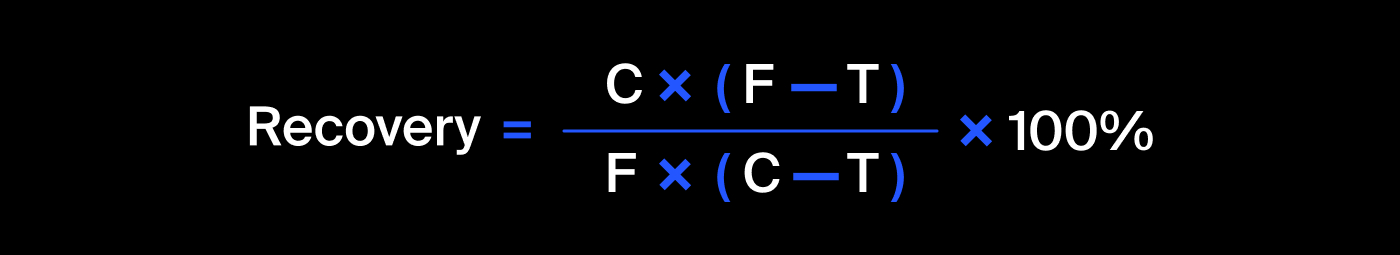
где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [18]:
#создадим нужные переменные для формулы рассчёта эффективности обогащения
c = g_train['rougher.output.concentrate_au']
f = g_train['rougher.input.feed_au']
t = g_train['rougher.output.tail_au']

In [19]:
#формула эффективности обогащения
recovery = (c*(f-t)) / (f*(c-t))*100

#посчитаем MAE
mae = mean_absolute_error(g_train['rougher.output.recovery'], recovery)
print('Средняя абсолютная ошибка:', mae)

Средняя абсолютная ошибка: 9.73512347450521e-15


MAE между нашими расчётами и значением признака = 9.7. Значение не слишком идеальное, но можно считать, что расчёты верны.

### Проанализируем признаки, недоступные в тестовой выборке

In [20]:
#подробнее рассмотрим, какие признаки отсутствуют в тестовой выборке
train_col = g_train.columns
test_col = g_test.columns
count = 0
for t in range(len(train_col)):
    if train_col[t] not in test_col:
        tc = train_col[t]
        count += 1
        print(tc)
print('Общее количество отличающихся столбцов: ', count)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

**Вывод**

Мы видим, что в тестовой выборке отсутствуют следующие признаки: 1) final.output; 2) primary_cleaner.output; 3) rougher.calculation; 4) rougher.output; 5) secondary_cleaner.output.

Пропущенные признаки описывают технологический процесс, а именно: 1) на каком этапе обработки продукт; 2) параметр продукта; 3) расчётные характеристики

### Предобработка данных

Поскольку в тестовых данных нам не достаёт признаков, то с помощью метода merge мы добавим необходимые признаки из полных данных.

In [21]:
#возьмём недостающие признаки в тестовой из полных данных
g_test_new = g_test.merge(
    g_full[['rougher.output.recovery', 'final.output.recovery', 'date']], how='inner', left_on='date', right_on='date')

g_test_new.info()

#удалим из обучающей столбцы, которых нет в тестовой
g_train = g_train[g_test_new.columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Мы помним, что больше всего пропусков было в признаке secondary_cleaner.output.tail_sol. В остальный признаках было пропущено не очень много значений. 

С помощью метода ffill мы заполним пропущенные значения. Метод использует предыдущее не пропущенное значение, чтобы заполнить пропуск

**P.S. пока не буду удалять эту часть вывода.**
Из условий задачи можно сделать вывод, что secondary_cleaner.output.tail_sol не пригодится в построении модели, раз так, то можно спокойной удалить пропуски, поскольку мы не знаем, какими значениями их можно было бы заполнить. Поскольку в остальных признаках не много пропусков (от 1% до 3%), то их тоже удалим.

In [22]:
#удалим пропущенные значения
#g_train.dropna(inplace=True)
#g_test_new.dropna(inplace=True)

#используем метод ffill для заполнения пропусков
g_train.fillna(method='ffill', inplace=True)
g_test_new.fillna(method='ffill', inplace=True)

print('Размер обучающей выборки:', g_train.shape)
print('Размер тестовой выборки:', g_test_new.shape)

Размер обучающей выборки: (14149, 55)
Размер тестовой выборки: (5290, 55)


In [23]:
#проверим наличие дубликатов
display(g_train.duplicated().sum(), g_test_new.duplicated().sum(), g_full.duplicated().sum())

0

0

0

**Выводы**

При подготовке данных мы выполнили следующее:

1. Выяснили, что эффективность обогащения рассчитана правильно
2. Проанализировали отсутствующие признаки в тестовых данных
3. Вернули отсутствующие признаки в тестовые данные (взяли их из полных данных)
4. Убрали пропущенные значения из тестовых и обучающих данных
5. Узнали, что дубликаты отсутствуют

Можно приступать к анализу данных

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [24]:
def metal_concentrate(rougher, primary, final, rougher_feed):
    plt.hist(g_full[rougher], bins=150, alpha=0.5, color='blue')
    plt.hist(g_full[primary], bins=150, alpha=0.5, color='green')
    plt.hist(g_full[final], bins=150, alpha=0.5, color='red')
    plt.hist(g_full[rougher_feed], bins=150, alpha=0.5, color='yellow')

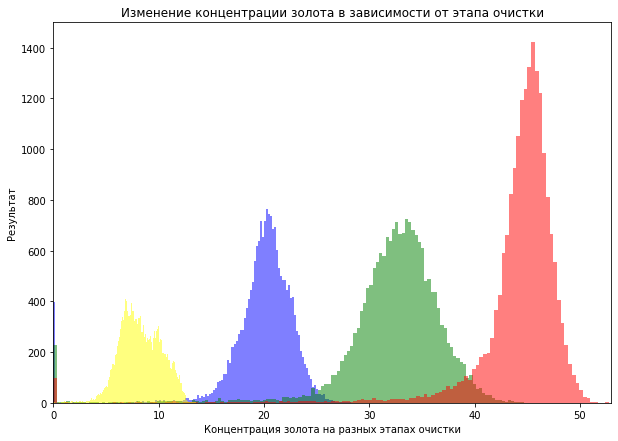

In [25]:
#концентрация золота на разных этапах очистки
plt.figure(figsize=(10,7))

metal_concentrate(
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au', 
    'rougher.input.feed_au')

plt.xlim(0, 53)
plt.ylim(0, 1500)
plt.xlabel('Концентрация золота на разных этапах очистки')
plt.ylabel('Результат')
plt.title('Изменение концентрации золота в зависимости от этапа очистки')

plt.show()

Мы видим, что концентрация золота увеличивается с каждым этапом очистки. Это хорошо

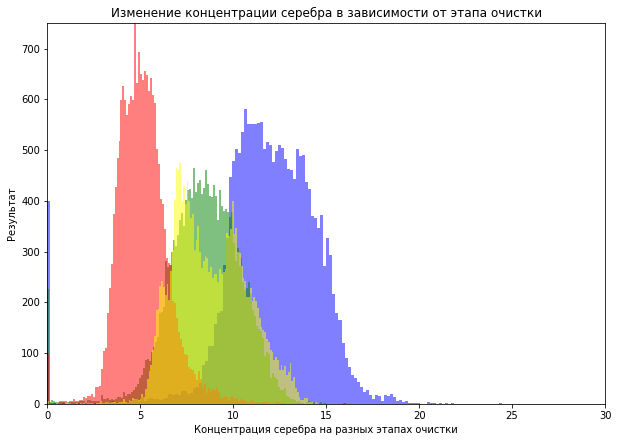

In [26]:
#концентрация серебра на разных этапах очистки
plt.figure(figsize=(10,7))

metal_concentrate('rougher.output.concentrate_ag', 
                  'primary_cleaner.output.concentrate_ag', 
                  'final.output.concentrate_ag', 
                  'rougher.input.feed_ag')

plt.xlim(0, 30)
plt.ylim(0, 750)
plt.xlabel('Концентрация серебра на разных этапах очистки')
plt.ylabel('Результат')
plt.title('Изменение концентрации серебра в зависимости от этапа очистки')

plt.show()

Видим, что концентрация серебра понижается с каждым этапом очистки.

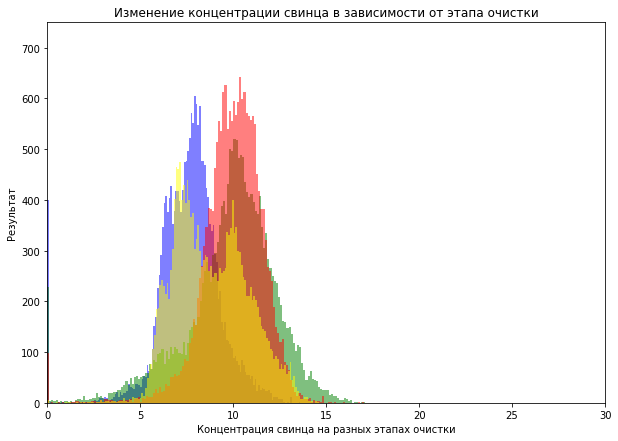

In [27]:
#концентрация свинца на разных этапах очистки
plt.figure(figsize=(10,7))

metal_concentrate(
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb', 
    'rougher.input.feed_ag')

plt.xlim(0, 30)
plt.ylim(0, 750)
plt.xlabel('Концентрация свинца на разных этапах очистки')
plt.ylabel('Результат')
plt.title('Изменение концентрации свинца в зависимости от этапа очистки')

plt.show()

После этапа флотации концентрация свинца увеличилась, а на финальном этапе просто усреднилась.

Можно сделать вывод, что очистка лучше всего влияет на золото. Ещё можно заметить, что на всех графика в 0 виден большой выброс

###  Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

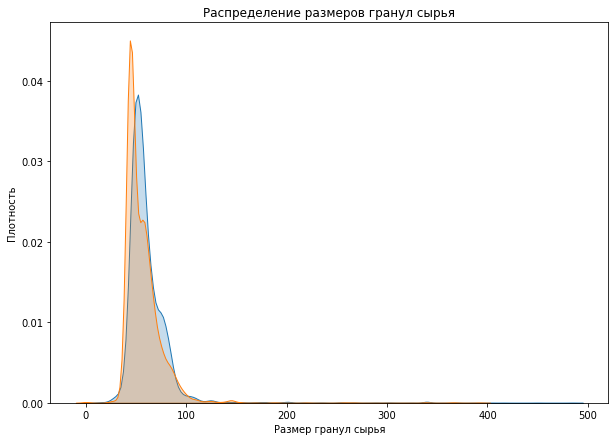

In [28]:
plt.figure(figsize=[10,7])

sns.kdeplot(g_train['rougher.input.feed_size'], shade=True)
sns.kdeplot(g_test_new['rougher.input.feed_size'], shade=True)

plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность')
plt.title('Распределение размеров гранул сырья')

plt.show()

Распределение размеров гранул сырья на этапе флотации схоже на обучающих и тестовых данных. Теперь проверим распределение на этапе первичной очистки.

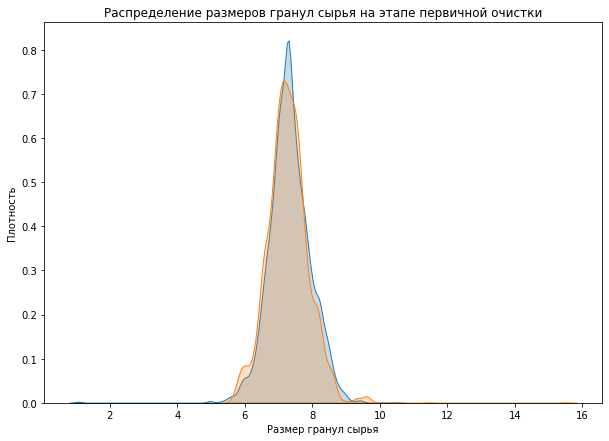

In [30]:
plt.figure(figsize=[10,7])

sns.kdeplot(g_train['primary_cleaner.input.feed_size'], shade=True)
sns.kdeplot(g_test_new['primary_cleaner.input.feed_size'], shade=True)

plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность')
plt.title('Распределение размеров гранул сырья на этапе первичной очистки')

plt.show()

Размер гранул сырья на этапе первичной очистки имеет нормальное рапсределение на тестовых и обучающих данных.

Поскольку в обоих случаях у нас нормальное распределение, то можно сделать вывод, что эти признаки не исказят результат нашей модели.

### Исследуем суммарную концентрацию всех веществ на разных стадиях

In [32]:
#просуммируем все концентрации разных веществ
rou_out_sum = (
    g_full['rougher.output.concentrate_ag'] + 
    g_full['rougher.output.concentrate_pb'] + 
    g_full['rougher.output.concentrate_sol'] +
    g_full['rougher.output.concentrate_au']
)

rou_in_sum = (
    g_full['rougher.input.feed_ag'] + 
    g_full['rougher.input.feed_pb'] +
    g_full['rougher.input.feed_sol'] +
    g_full['rougher.input.feed_au']
)

fin_sum = (
    g_full['final.output.concentrate_ag'] +
    g_full['final.output.concentrate_pb'] +
    g_full['final.output.concentrate_sol'] +
    g_full['final.output.concentrate_au']
)

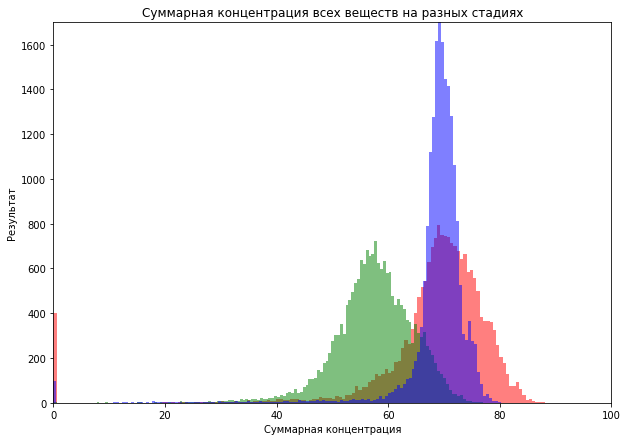

In [33]:
plt.figure(figsize=[10,7])

plt.hist(rou_out_sum, bins=150, alpha=0.5, color='r')
plt.hist(rou_in_sum, bins=150, alpha=0.5, color='g')
plt.hist(fin_sum, bins=150, alpha=0.5, color='b')

plt.xlim([0, 100])
plt.ylim([0, 1700])
plt.xlabel('Суммарная концентрация')
plt.ylabel('Результат')
plt.title('Суммарная концентрация всех веществ на разных стадиях')

plt.show()

In [34]:
#чтобы аномалии нам не мешались при обучении модели, то удалим их из обучющих данных
g_train = g_train.replace(0, np.nan).dropna()

В нуле мы видим небольшой столбец околонулевых значений. Можно с уверенностью сказать, что это аномалии. Удалим их и заново построим график.

Можно сказать, что на финальной стадии все значения усредняются

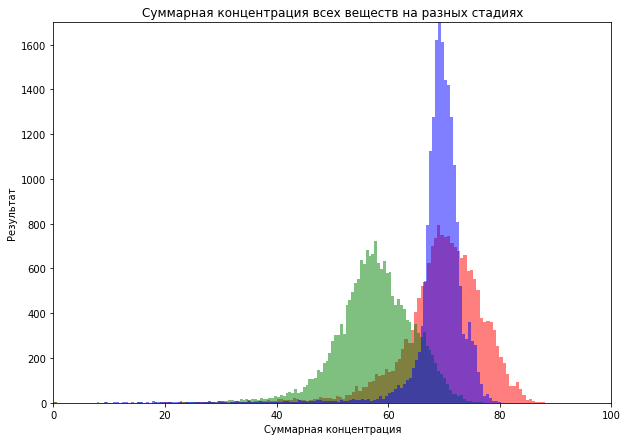

In [35]:
#заменим нулевые значения на nan, а после удалим их
rou_out_sum = rou_out_sum.replace(0, np.nan).dropna()
rou_in_sum = rou_in_sum.replace(0, np.nan).dropna()
fin_sum = fin_sum.replace(0, np.nan).dropna()

plt.figure(figsize=[10,7])

plt.hist(rou_out_sum, bins=150, alpha=0.5, color='r')
plt.hist(rou_in_sum, bins=150, alpha=0.5, color='g')
plt.hist(fin_sum, bins=150, alpha=0.5, color='b')

plt.xlim([0, 100])
plt.ylim([0, 1700])
plt.xlabel('Суммарная концентрация')
plt.ylabel('Результат')
plt.title('Суммарная концентрация всех веществ на разных стадиях')

plt.show()

Видим, что осталось немного значений в 0, но это просто небольшое количество данных, которые немного больше 0.

In [36]:
#не будем чистить тестовые данные
#g_test_new = g_test_new.replace(0, np.nan).dropna()

**Выводы**

В ходе анализа мы:

* Посмотрели как меняется концентрация металлов на разных этапах очистки
* Узнали размер гранул сырья
* Изучили суммарную концентрацию веществ на разных стадиях очистки

## Модель

### Функция для вычисления итоговой sMAPE

In [37]:
#напишем функцию для sMAPE и итоговой sMAPE
def smape(target, pred):
    return ((1 / len(target)) * (abs(target - pred)) / ((abs(target) + abs(pred)) / 2)).sum() * 100

def total_smape(rougher, final):
    return 0.25 * rougher + 0.75 * final

### Обучим разные модели и оценим их качество кросс-валидацией

In [38]:
#удалим столбец дата из наших данных
g_train = g_train.drop(['date'], axis=1)
g_test_new = g_test_new.drop(['date'], axis=1)

In [39]:
#подготовим признаки
features_train = g_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = g_test_new.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

target_train_r = g_train['rougher.output.recovery']
target_test_r = g_test_new['rougher.output.recovery']

target_train_f = g_train['final.output.recovery']
target_test_f = g_test_new['final.output.recovery']

In [40]:
#масштабирование
#scaler = StandardScaler()
#scaler.fit(features_train)
#features_train = scaler.transform(features_train)
#features_test = scaler.transform(features_test)

Рассмотрим три модели: дерево решений, случайный лес и линейную регрессию. 

Подберём к ним лучшие гиперпараметры

In [41]:
#линейная регрессия
def reg(features, target):
    best_reg = None    
    best_smape = 0
    pipe = make_pipeline(StandardScaler(), LinearRegression())
    scores = cross_val_score(pipe, features, target, cv=5, scoring=make_scorer(smape))
    final_score = sum(scores) / len(scores)
    if final_score > best_smape:
        best_reg = pipe
        best_smape = final_score
    return best_reg, best_smape

In [42]:
%%time
best_reg1, best_smape = reg(features_train, target_train_r)
print('Линейная регрессия для признака rougher.output.recovery:', 
      '\nСредняя sMAPE модели:', best_smape)

Линейная регрессия для признака rougher.output.recovery: 
Средняя sMAPE модели: 7.201953460972137
CPU times: user 697 ms, sys: 918 ms, total: 1.62 s
Wall time: 1.59 s


In [43]:
%%time
best_reg2, best_smape = reg(features_train, target_train_f)
print('Линейная регрессия для признака final.output.recovery:', 
      '\nСредняя sMAPE модели:', best_smape)

Линейная регрессия для признака final.output.recovery: 
Средняя sMAPE модели: 10.948044600179767
CPU times: user 574 ms, sys: 791 ms, total: 1.36 s
Wall time: 1.24 s


In [44]:
#дерево решений 
def tree(features, target):
    best_smape = 0
    best_depth = None
    best_tree = None
    for depth in range(1, 15, 2):
        pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42, max_depth=depth))
        scores = cross_val_score(pipe, features, target, cv=5, scoring=make_scorer(smape))
        final_score = sum(scores) / len(scores)
        if final_score > best_smape:
            best_smape = final_score
            best_depth = depth
            best_tree = pipe
    return best_smape, best_depth, best_tree            
    

In [45]:
%%time
best_smape, best_depth, best_tree1 = tree(features_train, target_train_r)
print('Дерево решений для признака rougher.output.recovery:', 
      '\nЛучшая глубина:', best_depth, ', ' 
      '\nСредняя sMAPE модели:', best_smape)

Дерево решений для признака rougher.output.recovery: 
Лучшая глубина: 13 , 
Средняя sMAPE модели: 9.472276220585176
CPU times: user 11.8 s, sys: 56.7 ms, total: 11.8 s
Wall time: 11.8 s


In [46]:
%%time
best_smape, best_depth, best_tree2 = tree(features_train, target_train_f)
print('Дерево решений для признака final.output.recovery:', 
      '\nЛучшая глубина:', best_depth, ', ' 
      '\nСредняя sMAPE модели:', best_smape)

Дерево решений для признака final.output.recovery: 
Лучшая глубина: 13 , 
Средняя sMAPE модели: 14.542337969721956
CPU times: user 11.9 s, sys: 79 ms, total: 12 s
Wall time: 12 s


In [47]:
#случайный лес
def forest(features, target):
    best_smape = 0
    best_depth = None
    best_forest = None
    best_est = None
    for depth in range(1, 15, 2): 
        for est in range(1, 20, 2):
            pipe = make_pipeline(
                StandardScaler(), 
                RandomForestRegressor(random_state=42, max_depth=depth, n_estimators=est))
            
            scores = cross_val_score(pipe, features, target, cv=5, scoring=make_scorer(smape))
            final_score = sum(scores) / len(scores)
            if final_score > best_smape:
                best_smape = final_score
                best_depth = depth
                best_est = est
                best_forest = pipe
                
    return best_smape, best_depth, best_est, best_forest 

In [48]:
%%time
best_smape, best_depth, best_est, best_forest1 = forest(features_train, target_train_r)
print('Случайный лес для признака rougher.output.recovery:', 
      '\nЛучшая глубина:', best_depth, ', ' 
      '\nЛучшее дерево:', best_est, ', '
      '\nСредняя sMAPE модели:', best_smape)

Случайный лес для признака rougher.output.recovery: 
Лучшая глубина: 9 , 
Лучшее дерево: 1 , 
Средняя sMAPE модели: 10.056331845510908
CPU times: user 11min 19s, sys: 2.24 s, total: 11min 22s
Wall time: 11min 22s


In [49]:
%%time
best_smape, best_depth, best_est, best_forest2 = forest(features_train, target_train_f)
print('Случайный лес для признака final.output.recovery:', 
      '\nЛучшая глубина:', best_depth, ', ' 
      '\nЛучшее дерево:', best_est, ', '
      '\nСредняя sMAPE модели:', best_smape)

Случайный лес для признака final.output.recovery: 
Лучшая глубина: 13 , 
Лучшее дерево: 1 , 
Средняя sMAPE модели: 14.625415291328546
CPU times: user 11min 35s, sys: 3.07 s, total: 11min 38s
Wall time: 11min 38s


**Случайный лес показал худший результат. Линейная регрессия сработала быстро и с лучшим результатом. Хоть дерево решений и второй результат, но линейная регрессия чуточку лучше. Остановимся на линейной регрессии**

In [50]:
#лучшая модель леса для признака rougher.output.recovery
#model_r = best_forest1
model_r = best_reg1

#лучшая модель леса для признака final.output.recovery
#model_f = best_forest2
model_f = best_reg2

Получим предсказание на лучшей модели, затем рассчитаем smape_rough и smape_final, а после получим итоговое sMAPE

In [51]:
#получим предсказание и найдём smape rougher
model_r.fit(features_train, target_train_r)
r_predict = model_r.predict(features_test)

smape_rougher = smape(target_test_r, r_predict)
print('sMAPE для rougher.output.recovery:', smape_rougher)

sMAPE для rougher.output.recovery: 8.598065773134234


In [52]:
#получим предсказание и найдём smape final
model_f.fit(features_train, target_train_f)
f_predict = model_f.predict(features_test)

smape_final = smape(target_test_f, f_predict)
print('sMAPE для final.output.recovery:', smape_final)

sMAPE для final.output.recovery: 10.00458728400107


In [53]:
grand_smape = total_smape(smape_rougher, smape_final)
print('Итоговое sMAPE:', grand_smape)

Итоговое sMAPE: 9.652956906284363


Создадим константную модель и сравним наш итоговый результат с ней

In [54]:
rougher_median = pd.Series(target_train_r.median(), index=target_test_r.index)
final_median = pd.Series(target_train_f.median(), index=target_test_f.index)

const_smape = (0.25 * smape(target_test_r, rougher_median)) + (0.75 * smape(target_test_f, final_median))
print(const_smape)

9.437345213050548


**Выводы**

Мы проделали следующее:
* Написали функцию для вычисления sMAPE
* Подготовили признаки и провели масштабирование
* Построили три модели: дерево решений, случайный лес и линейная регрессия
* Лучшей моделью оказалась линейная регрессия
* На лучшей модели рассчитали итоговый sMAPE (sMAPE ≈ 9.7)
* Сравнили итоговый sMAPE с sMAPE константной модели (sMAPE константной модели ≈ 9.4)



## Общий вывод

В ходе работы мы:

1. Изучили данные комании «Цифра».
2. Проверили, что эффективность обогащения рассчитана правильно
3. Изучили признаки, недоступные в тестовой выборке
4. Провели небольшую предобработку данных
5. Провели анализ данных
6. Посмотрели как меняется концентрация металлов на разных этапах очистки
7. Узнали размер гранул сырья
8. Изучили суммарную концентрацию веществ на разных стадиях очистки
9. Написали функцию для вычисления sMAPE
10. Обучили модели и рассчитали итоговый sMAPE

Нам были предоставленные 3 файла с данными: обучающие, тестовые и полные. Данные были сырые: их просто выгрузили из хранилища. 

После изучения данных мы рассчитали эффективность обогащения. MAE между нашими расчётами и значением признака = 9.7. Значение не идеальное, но можно считать, что расчёты верны. 

**Итог**

После построения моделей мы выяснили, что линейная регрессия - лучшая модель. sMAPE линейной регрессии ≈ 9.7. sMAPE константной модели ≈ 9.4. sMAPE модели проигрывает константе ≈ 0.3 пункта. Разница не очень критичная, но всё же. Можно сказать, что модель почти адекватна

Предположения, которые могли бы уменьшить наш итоговый sMAPE:
* Иначе обработать пропуски в данных
* Использовать дополнительные модели к существующим
* Подобрать другие гиперпараметры